# Assignment 15 Solution

#### Q1. Deep Learning.

**a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.**



**Ans**:

In [2]:
import tensorflow as tf
from functools import partial

In [3]:
# Define the number of inputs and outputs
n_inputs = 28 * 28 # MNIST
n_outputs = 10

In [4]:
# Define the number of neurons in each hidden layer
n_hidden1 = 100
n_hidden2 = 100
n_hidden3 = 100
n_hidden4 = 100
n_hidden5 = 100

In [5]:
# Define the initializer and activation function to use
he_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
elu_activation = tf.keras.activations.elu

In [7]:
# Create the model using the Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # Flatten the input data
    tf.keras.layers.Dense(n_hidden1, activation=elu_activation, kernel_initializer=he_init), # First hidden layer
    tf.keras.layers.Dense(n_hidden2, activation=elu_activation, kernel_initializer=he_init), # Second hidden layer
    tf.keras.layers.Dense(n_hidden3, activation=elu_activation, kernel_initializer=he_init), # Third hidden layer
    tf.keras.layers.Dense(n_hidden4, activation=elu_activation, kernel_initializer=he_init), # Fourth hidden layer
    tf.keras.layers.Dense(n_hidden5, activation=elu_activation, kernel_initializer=he_init), # Fifth hidden layer
    tf.keras.layers.Dense(n_outputs) # Output layer
])

#### b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.

**Ans**:

In [8]:
from tensorflow import keras
import numpy as np

In [9]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()


In [10]:
# Scale the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0


In [11]:
# Create a validation set and training set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [12]:
# Only keep digits 0 to 4 in the training and validation sets
X_train = X_train[y_train < 5]
y_train = y_train[y_train < 5]
X_valid = X_valid[y_valid < 5]
y_valid = y_valid[y_valid < 5]


In [13]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])


In [14]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
# Define early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])


Epoch 1/30


877/877 [==============================] - 7s 6ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 2/30
877/877 [==============================] - 5s 6ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0455 - val_accuracy: 0.9828
Epoch 3/30
877/877 [==============================] - 6s 6ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0341 - val_accuracy: 0.9910
Epoch 4/30
877/877 [==============================] - 5s 6ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0392 - val_accuracy: 0.9887
Epoch 5/30
877/877 [==============================] - 6s 6ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0295 - val_accuracy: 0.9918
Epoch 6/30
877/877 [==============================] - 6s 7ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0313 - val_accuracy: 0.9926
Epoch 7/30
877/877 [==============================] - 5s 6ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0311 - val_accuracy: 0.9914
Epoc

In [18]:
# Save the final model
model.save("my_mnist_model.h5")

#### c. Tune the hyperparameters using cross-validation and see what precision you can achieve.

**Ans**:

#### d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?

**Ans:**

In [19]:
# Build DNN with Batch Normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

In [20]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [21]:
# Train model
history_bn = model.fit(X_train, y_train, epochs=100, batch_size=32,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb])


Epoch 1/100
877/877 [==============================] - 11s 7ms/step - loss: 0.1305 - accuracy: 0.9592 - val_loss: 0.0545 - val_accuracy: 0.9808
Epoch 2/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 3/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0433 - accuracy: 0.9861 - val_loss: 0.0391 - val_accuracy: 0.9867
Epoch 4/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 5/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0405 - val_accuracy: 0.9891
Epoch 6/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 7/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0382 - val_accuracy: 0.989

In [22]:
import matplotlib.pyplot as plt

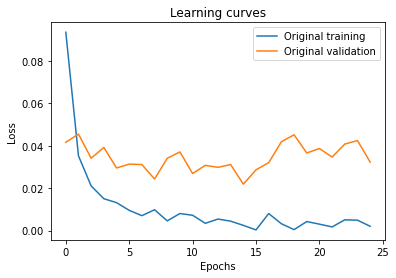

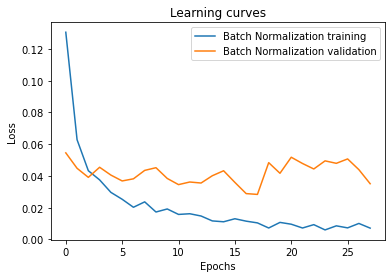

In [23]:
# Plot learning curves
def plot_learning_curves(history, label=None):
    plt.plot(history.history["loss"], label=label + " training")
    plt.plot(history.history["val_loss"], label=label + " validation")
    plt.legend()
    plt.title("Learning curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

plot_learning_curves(history, label="Original")
plot_learning_curves(history_bn, label="Batch Normalization")


#### e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?

**Ans:**

In [24]:
# Build DNN with Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [25]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [26]:
# Train model
history_dropout = model.fit(X_train, y_train, epochs=100, batch_size=32,
                            validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping_cb])


Epoch 1/100
877/877 [==============================] - 8s 7ms/step - loss: 0.2092 - accuracy: 0.9344 - val_loss: 0.0790 - val_accuracy: 0.9765
Epoch 2/100
877/877 [==============================] - 6s 6ms/step - loss: 0.1153 - accuracy: 0.9657 - val_loss: 0.0592 - val_accuracy: 0.9820
Epoch 3/100
877/877 [==============================] - 6s 7ms/step - loss: 0.0901 - accuracy: 0.9731 - val_loss: 0.0521 - val_accuracy: 0.9848
Epoch 4/100
877/877 [==============================] - 6s 7ms/step - loss: 0.0833 - accuracy: 0.9741 - val_loss: 0.0503 - val_accuracy: 0.9840
Epoch 5/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0676 - accuracy: 0.9801 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 6/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0646 - accuracy: 0.9797 - val_loss: 0.0485 - val_accuracy: 0.9844
Epoch 7/100
877/877 [==============================] - 5s 6ms/step - loss: 0.0544 - accuracy: 0.9842 - val_loss: 0.0331 - val_accuracy: 0.9883

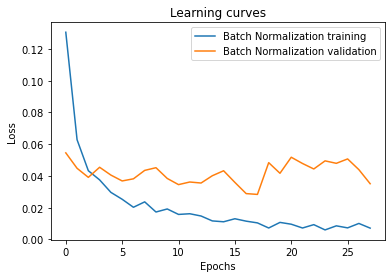

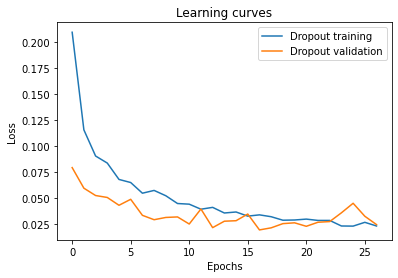

In [27]:
plot_learning_curves(history_bn, label="Batch Normalization")
plot_learning_curves(history_dropout, label="Dropout")


#### Q2. Transfer learning.

**a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.**

**b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?**

**c. Try caching the frozen layers, and train the model again: how much faster is it now?**

**d. Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?**

**e. Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?**

**Ans**:

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
# Load the pretrained model
pretrained_model = keras.models.load_model("my_mnist_model.h5")
pretrained_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 5)                 505       
                                                                 
Total params: 266105 (1.02 MB)
Trainable params: 266105 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Create a new DNN that reuses all the pretrained hidden layers of the previous model
new_model = keras.models.Sequential(pretrained_model.layers[:-1])


In [31]:
# Freeze the reused layers
for layer in new_model.layers:
    layer.trainable = False

In [32]:
# Add a new softmax output layer with the desired number of units
new_model.add(keras.layers.Dense(5, activation="softmax"))


In [33]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [34]:
# Load the training data for digits 5 to 9
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train[y_train >= 5]
y_train = y_train[y_train >= 5] - 5
X_test = X_test[y_test >= 5]
y_test = y_test[y_test >= 5] - 5

In [35]:
# Train the new model on digits 5 to 9 using only 100 images per digit
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
16/16 [==============================] - 1s 55ms/step - loss: 5441.3247 - accuracy: 0.5780 - val_loss: 3893.1721 - val_accuracy: 0.5719
Epoch 2/10
16/16 [==============================] - 1s 37ms/step - loss: 2732.3601 - accuracy: 0.7380 - val_loss: 8105.5684 - val_accuracy: 0.5192
Epoch 3/10
16/16 [==============================] - 1s 35ms/step - loss: 2828.9941 - accuracy: 0.7320 - val_loss: 5717.3540 - val_accuracy: 0.5591
Epoch 4/10
16/16 [==============================] - 1s 39ms/step - loss: 1881.2054 - accuracy: 0.7880 - val_loss: 2501.9626 - val_accuracy: 0.7052
Epoch 5/10
16/16 [==============================] - 1s 42ms/step - loss: 1656.0403 - accuracy: 0.7820 - val_loss: 5950.2910 - val_accuracy: 0.6414
Epoch 6/10
16/16 [==============================] - 1s 39ms/step - loss: 1720.6633 - accuracy: 0.8180 - val_loss: 2344.8901 - val_accuracy: 0.7505
Epoch 7/10
16/16 [==============================] - 1s 41ms/step - loss: 1703.5388 - accuracy: 0.7900 - val_loss: 1897

In [36]:
# Evaluate the trained model
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


152/152 [==============================] - 1s 3ms/step - loss: 2278.2856 - accuracy: 0.7867
Test accuracy: 0.7866694331169128


In [37]:
# Try caching the frozen layers and train the model again
new_model.layers[0].trainable = True
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
16/16 [==============================] - 1s 55ms/step - loss: 813.8452 - accuracy: 0.8660 - val_loss: 1339.1198 - val_accuracy: 0.8303
Epoch 2/10
16/16 [==============================] - 1s 40ms/step - loss: 801.4152 - accuracy: 0.8580 - val_loss: 1625.9537 - val_accuracy: 0.8070
Epoch 3/10
16/16 [==============================] - 1s 33ms/step - loss: 913.3399 - accuracy: 0.8800 - val_loss: 4121.3047 - val_accuracy: 0.6715
Epoch 4/10
16/16 [==============================] - 1s 39ms/step - loss: 1194.6594 - accuracy: 0.8380 - val_loss: 2410.6760 - val_accuracy: 0.7540
Epoch 5/10
16/16 [==============================] - 1s 39ms/step - loss: 844.2501 - accuracy: 0.8600 - val_loss: 1583.9987 - val_accuracy: 0.8206
Epoch 6/10
16/16 [==============================] - 1s 34ms/step - loss: 428.1923 - accuracy: 0.8920 - val_loss: 2814.3250 - val_accuracy: 0.7145
Epoch 7/10
16/16 [==============================] - 1s 42ms/step - loss: 1157.0613 - accuracy: 0.8160 - val_loss: 1910.6104

In [38]:
# Evaluate the trained model again
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


152/152 [==============================] - 1s 3ms/step - loss: 1912.6688 - accuracy: 0.7945
Test accuracy: 0.7944867014884949


In [39]:
# Try again reusing just four hidden layers instead of five
new_model2 = keras.models.Sequential(pretrained_model.layers[:-2])
for layer in new_model2.layers:
    layer.trainable = False
new_model2.add(keras.layers.Dense(5, activation="softmax"))
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
16/16 [==============================] - 2s 58ms/step - loss: 1808.6482 - accuracy: 0.6700 - val_loss: 559.6791 - val_accuracy: 0.8280
Epoch 2/10
16/16 [==============================] - 1s 49ms/step - loss: 400.3824 - accuracy: 0.8500 - val_loss: 1244.8416 - val_accuracy: 0.7503
Epoch 3/10
16/16 [==============================] - 1s 49ms/step - loss: 223.5965 - accuracy: 0.9160 - val_loss: 255.3690 - val_accuracy: 0.9015
Epoch 4/10
16/16 [==============================] - 1s 50ms/step - loss: 155.3806 - accuracy: 0.9160 - val_loss: 265.1325 - val_accuracy: 0.8805
Epoch 5/10
16/16 [==============================] - 1s 56ms/step - loss: 126.2179 - accuracy: 0.9280 - val_loss: 242.6795 - val_accuracy: 0.8926
Epoch 6/10
16/16 [==============================] - 1s 72ms/step - loss: 75.2245 - accuracy: 0.9480 - val_loss: 326.2697 - val_accuracy: 0.8609
Epoch 7/10
16/16 [==============================] - 1s 41ms/step - loss: 33.5346 - accuracy: 0.9620 - val_loss: 314.1270 - val_ac

In [40]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


152/152 [==============================] - 0s 3ms/step - loss: 275.0585 - accuracy: 0.8776
Test accuracy: 0.8775972127914429


In [41]:
# Now unfreeze the top two hidden layers and continue training
for layer in new_model2.layers[-3:]:
    layer.trainable = True
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
16/16 [==============================] - 1s 50ms/step - loss: 1649479.6250 - accuracy: 0.3300 - val_loss: 27.8606 - val_accuracy: 0.3150
Epoch 2/10
16/16 [==============================] - 0s 32ms/step - loss: 5.5605 - accuracy: 0.3160 - val_loss: 4.0805 - val_accuracy: 0.3129
Epoch 3/10
16/16 [==============================] - 0s 32ms/step - loss: 1.7949 - accuracy: 0.3280 - val_loss: 4.4177 - val_accuracy: 0.3545
Epoch 4/10
16/16 [==============================] - 0s 31ms/step - loss: 1.7939 - accuracy: 0.3560 - val_loss: 3.2743 - val_accuracy: 0.3931
Epoch 5/10
16/16 [==============================] - 0s 33ms/step - loss: 1.3424 - accuracy: 0.3540 - val_loss: 3.2754 - val_accuracy: 0.3859
Epoch 6/10
16/16 [==============================] - 0s 32ms/step - loss: 1.2836 - accuracy: 0.3760 - val_loss: 3.6334 - val_accuracy: 0.4022
Epoch 7/10
16/16 [==============================] - 0s 33ms/step - loss: 1.3488 - accuracy: 0.3360 - val_loss: 2.9267 - val_accuracy: 0.3763
Epoch 

In [42]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


152/152 [==============================] - 0s 3ms/step - loss: 2.9517 - accuracy: 0.3931
Test accuracy: 0.39312899112701416


#### Q3. Pretraining on an auxiliary task.

**a. In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use TensorFlow’s concat() function with axis=1 to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.**

**b. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.**

**c. Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.**

**d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.**

**Ans**:

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [44]:
# Load the MNIST dataset and split it into two sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train1 = X_train_full[:55000]
y_train1 = y_train_full[:55000]
X_train2 = X_train_full[55000:]
y_train2 = y_train_full[55000:]

In [45]:
# Define a function to generate a training batch where each instance is a pair of MNIST images
def generate_batch(batch_size):
    X_batch1 = np.empty((batch_size, 28, 28), dtype=np.float32)
    X_batch2 = np.empty((batch_size, 28, 28), dtype=np.float32)
    y_batch = np.empty((batch_size, 1), dtype=np.int32)
    for i in range(batch_size):
        index1 = np.random.randint(len(X_train1))
        X_batch1[i] = X_train1[index1]
        if i % 2 == 0:
            # Images from the same class
            index2 = index1
            while index2 == index1:
                index2 = np.random.randint(len(X_train1))
                if y_train1[index2] == y_train1[index1]:
                    break
            y_batch[i] = 0
        else:
            # Images from different classes
            index2 = index1
            while index2 == index1 or y_train1[index2] == y_train1[index1]:
                index2 = np.random.randint(len(X_train1))
            y_batch[i] = 1
        X_batch2[i] = X_train1[index2]
    return [X_batch1, X_batch2], y_batch


In [46]:
# Build two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer
def build_dnn():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(5):
        model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    return model

dnn_a = build_dnn()
dnn_b = build_dnn()

In [47]:
# Add one more hidden layer with 10 units on top of both DNNs
merged_output = keras.layers.concatenate([dnn_a.output, dnn_b.output])
hidden_layer = keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal")(merged_output)


In [48]:
# Add an output layer with a single neuron using the logistic activation function
output_layer = keras.layers.Dense(1, activation="sigmoid")(hidden_layer)


In [49]:
# Create a new model that takes two MNIST images as inputs and outputs a single value representing whether the images belong to the same class or not
model = keras.models.Model(inputs=[dnn_a.input, dnn_b.input], outputs=[output_layer])


In [50]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [51]:
# Train the DNN on this training set
batch_size = 32
for epoch in range(10):
    for iteration in range(len(X_train1) // batch_size):
        X_batch, y_batch = generate_batch(batch_size)
        model.train_on_batch(X_batch, y_batch)


In [52]:
# Create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons
new_model = keras.models.Sequential(dnn_a.layers[:-1])
for layer in new_model.layers:
    layer.trainable = False

new_model.add(keras.layers.Dense(10, activation="softmax"))


In [53]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [54]:
# Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class
history = new_model.fit(X_train2, y_train2, epochs=10)


Epoch 1/10
157/157 [==============================] - 1s 3ms/step - loss: 3.1154 - accuracy: 0.0838
Epoch 2/10
157/157 [==============================] - 0s 3ms/step - loss: 2.2256 - accuracy: 0.1740
Epoch 3/10
157/157 [==============================] - 0s 3ms/step - loss: 2.0859 - accuracy: 0.2784
Epoch 4/10
157/157 [==============================] - 0s 3ms/step - loss: 2.0079 - accuracy: 0.3274
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 1.9544 - accuracy: 0.3390
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 1.9136 - accuracy: 0.3566
Epoch 7/10
157/157 [==============================] - 1s 3ms/step - loss: 1.8873 - accuracy: 0.3598
Epoch 8/10
157/157 [==============================] - 1s 3ms/step - loss: 1.8601 - accuracy: 0.3702
Epoch 9/10
157/157 [==============================] - 1s 3ms/step - loss: 1.8462 - accuracy: 0.3676
Epoch 10/10
157/157 [==============================] - 0s 3ms/step - loss: 1.8236 - accuracy: 0.3840

In [55]:
# Evaluate the trained model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 [==============================] - 1s 3ms/step - loss: 1.8793 - accuracy: 0.3695
Test accuracy: 0.3695000112056732
